In [2]:
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import xarray as xr
import shapely as shp

In [3]:
filepath = r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\historical-Crete\greece_burned_area\burn_area_ignitions\crete_burn_ignitions.shp"

# Load shapefile as a GeoDataFrame
historical_fires = gpd.read_file(filepath)
historical_fires

,id,initialdat,finaldate,area_ha,year,latitude,longitude,hectareas,geometry
0,7840,18-07-2012,18-07-2012,201,2012,35.358700,23.575900,201,"POLYGON ((5560746.29 1476831.995, 5561058.589 ..."
1,829,30-05-2016,31-05-2016,108,2016,35.472500,23.614100,108,"POLYGON ((5561793.303 1489646.292, 5561859.449..."
2,13950,04-07-2018,05-07-2018,115,2018,35.366500,23.776100,115,"POLYGON ((5578452.764 1480272.26, 5578434.861 ..."
3,41509,22-07-2020,22-07-2020,39,2020,35.175411,24.408306,39,"POLYGON ((5637709.96 1470303.963, 5637711.78 1..."
4,865,25-10-2016,01-11-2016,165,2016,35.247433,24.491125,165,"POLYGON ((5645184.681 1480109.609, 5645259.879..."
...,...,...,...,...,...,...,...,...,...
58,8629,04-09-2013,04-09-2013,54,2013,34.985200,25.031500,54,"POLYGON ((5698466.442 1460993.255, 5698664.88 ..."
59,4538,29-08-2012,29-08-2012,41,2012,35.259300,25.306000,41,"POLYGON ((5718443.111 1495300.988, 5718488.704..."
60,6694,30-07-2012,30-07-2012,1337,2012,35.064827,25.363468,1337,"POLYGON ((5726531.054 1472329.814, 5726387.821..."
61,6694,30-07-2012,30-07-2012,1337,2012,NaN,NaN,0,"POLYGON ((5727888.809 1471654.09, 5727888.809 ..."


In [4]:
# Remove rows with NaN in latitude or longitude
filtered_gdf = historical_fires.dropna(subset=['latitude', 'longitude', 'initialdat'])
filtered_gdf['initialdat'] = pd.to_datetime(filtered_gdf['initialdat'], format='%d-%m-%Y').dt.strftime('%Y-%m-%d')

filtered_gdf

c:\Users\jsoma\AppData\Local\miniconda3\envs\test\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,initialdat,finaldate,area_ha,year,latitude,longitude,hectareas,geometry
0,7840,2012-07-18,18-07-2012,201,2012,35.358700,23.575900,201,"POLYGON ((5560746.29 1476831.995, 5561058.589 ..."
1,829,2016-05-30,31-05-2016,108,2016,35.472500,23.614100,108,"POLYGON ((5561793.303 1489646.292, 5561859.449..."
2,13950,2018-07-04,05-07-2018,115,2018,35.366500,23.776100,115,"POLYGON ((5578452.764 1480272.26, 5578434.861 ..."
3,41509,2020-07-22,22-07-2020,39,2020,35.175411,24.408306,39,"POLYGON ((5637709.96 1470303.963, 5637711.78 1..."
4,865,2016-10-25,01-11-2016,165,2016,35.247433,24.491125,165,"POLYGON ((5645184.681 1480109.609, 5645259.879..."
5,7869,2012-07-28,28-07-2012,913,2012,35.164173,24.527719,913,"POLYGON ((5649033.034 1471260.028, 5649246.92 ..."
6,7869,2012-07-28,28-07-2012,913,2012,35.180500,24.511600,41,"POLYGON ((5649033.034 1471260.028, 5649246.92 ..."
7,39627,2008-08-21,21-08-2008,993,2008,35.164173,24.527719,41,"POLYGON ((5649779.813 1471507.012, 5649522.342..."
8,39627,2008-08-21,21-08-2008,993,2008,35.180500,24.511600,993,"POLYGON ((5646903.794 1471967.233, 5647258.946..."
9,4514,2011-07-29,29-07-2011,2859,2011,35.178900,24.589300,2859,"POLYGON ((5659872.496 1467378.356, 5659766.662..."


In [5]:
# Save only the desired columns to a new CSV file
output_csv = r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\filtered_burn_ignitions.csv"
filtered_gdf[['initialdat', 'longitude', 'latitude']].to_csv(output_csv, index=False, header=['date', 'lon', 'lat'])

In [6]:
df = pd.read_csv(output_csv)
df

,date,lon,lat
0,2012-07-18,23.575900,35.358700
1,2016-05-30,23.614100,35.472500
2,2018-07-04,23.776100,35.366500
3,2020-07-22,24.408306,35.175411
4,2016-10-25,24.491125,35.247433
5,2012-07-28,24.527719,35.164173
6,2012-07-28,24.511600,35.180500
7,2008-08-21,24.527719,35.164173
8,2008-08-21,24.511600,35.180500
9,2011-07-29,24.589300,35.178900


## Study the size distribution

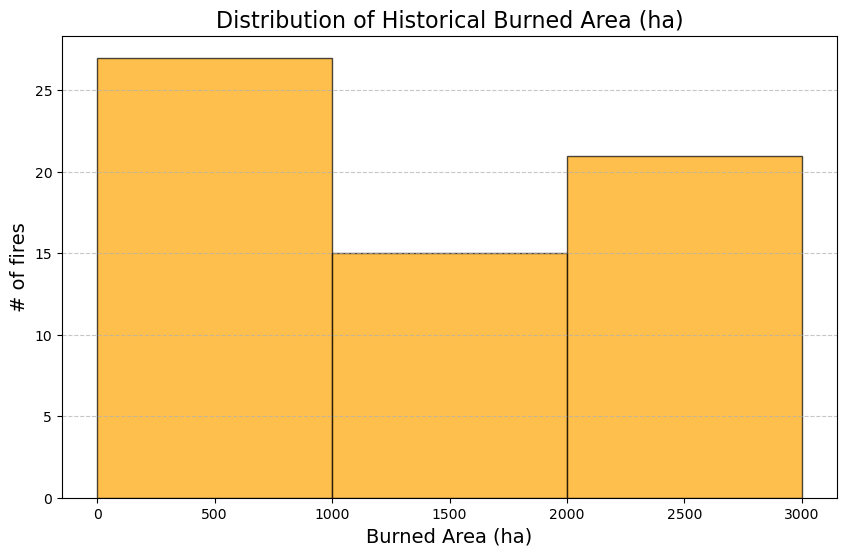

In [7]:
# Define bins from 0 to 3000 in steps of 500
bins = np.arange(0, 3001, 1000)

plt.figure(figsize=(10, 6))
plt.hist(historical_fires['area_ha'], bins=bins, color='orange', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Historical Burned Area (ha)', fontsize=16)
plt.xlabel('Burned Area (ha)', fontsize=14)
plt.ylabel('# of fires', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [8]:
simulated_fires = gpd.read_file(r"C:\Users\jsoma\Desktop\simulation_crete\variable_area_uniform_dist.shp")
simulated_fires

,date,geometry
0,2012-08-29,"POLYGON ((25.29563 35.25982, 25.29555 35.26054..."
1,2011-07-14,"POLYGON ((24.60666 35.10575, 24.60666 35.10634..."
2,2016-05-30,"POLYGON ((23.62211 35.47684, 23.62187 35.47619..."
3,2014-07-05,"POLYGON ((24.87109 35.00985, 24.87108 35.01033..."
4,2011-07-29,"POLYGON ((24.59164 35.10765, 24.59131 35.108, ..."
5,2011-07-14,"POLYGON ((24.60819 35.23405, 24.60863 35.23403..."
6,2011-07-29,"POLYGON ((24.58083 35.17729, 24.58033 35.1775,..."
7,2014-07-05,"POLYGON ((24.86628 34.96013, 24.86657 34.96043..."
8,2016-10-25,"POLYGON ((24.499 35.26522, 24.49962 35.26487, ..."
9,2009-07-14,"POLYGON ((24.6777 35.15389, 24.6771 35.15432, ..."


In [9]:
# Check the CRS and reproject if necessary
if simulated_fires.crs.is_geographic:
    # Reproject to a UTM or other appropriate projected CRS
    simulated_fires = simulated_fires.to_crs(epsg=32634)  # Replace with a suitable EPSG code for your region

# Calculate the area in hectares
simulated_fires['area_ha'] = simulated_fires.geometry.area / 10_000

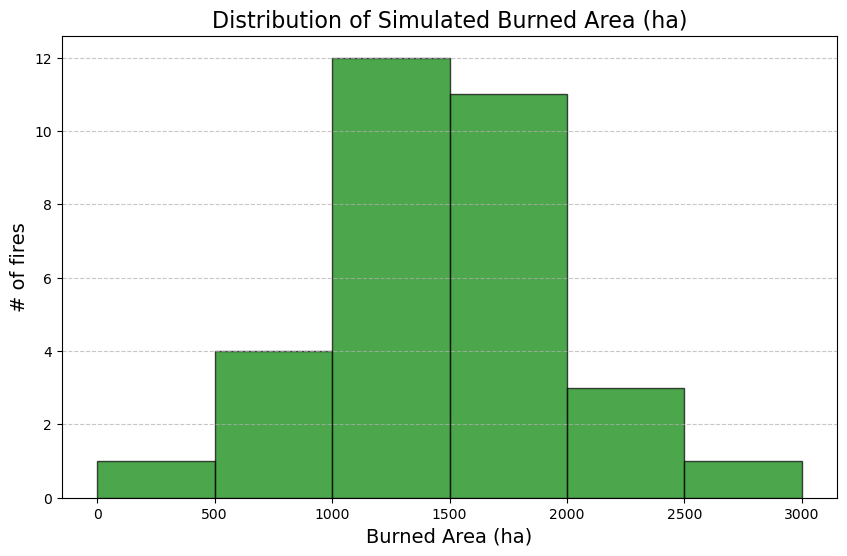

In [10]:
# Define bins from 0 to 3000 in steps of 500
bins = np.arange(0, 3001, 500)

plt.figure(figsize=(10, 6))
plt.hist(simulated_fires['area_ha'], bins=bins, color='green', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Simulated Burned Area (ha)', fontsize=16)
plt.xlabel('Burned Area (ha)', fontsize=14)
plt.ylabel('# of fires', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()